In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#Magic command in python
%matplotlib inline
#setting the figure size of all the graphs 20 by 10 by default
plt.rcParams["figure.figsize"] = (20,10)

# Loading Data Set 

In [37]:
raw_data_frame = pd.read_csv('car data.csv')

In [38]:
raw_data_frame.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [39]:
raw_data_frame.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


# Pre-processign & Stats

In [40]:
print(raw_data_frame['Seller_Type'].unique())
print(raw_data_frame['Fuel_Type'].unique())
print(raw_data_frame['Transmission'].unique())
print(raw_data_frame['Owner'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


In [41]:
#Checking statistical details about dataset
raw_data_frame.describe(include="all")

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [42]:
#Checking for NUll Values
raw_data_frame.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

As we can see there are no null values in our entire dataset now we will perform feature engineering to convert data set into first Normal Form

In [43]:
raw_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [44]:
raw_data_frame['Car_Name'].isnull().sum()

0

## Feature Engineering 

In [45]:
#Machine Learning model only works with numbers that is car name was useless and we dropped that column
raw_data_frame2 = raw_data_frame.drop('Car_Name', axis=1)

In [46]:
raw_data_frame2.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [47]:
#Subtracting launch year of car with the current year to count no of years to estimate price depreciation and other factors etc
raw_data_frame2["no_of_years"] = 2023-raw_data_frame2["Year"]

In [48]:
raw_data_frame2.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [49]:
raw_data_frame3 = raw_data_frame2.drop('Year', axis = 1)

In [50]:
raw_data_frame3.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


# Data Visualization for depicting Noise and Outliers

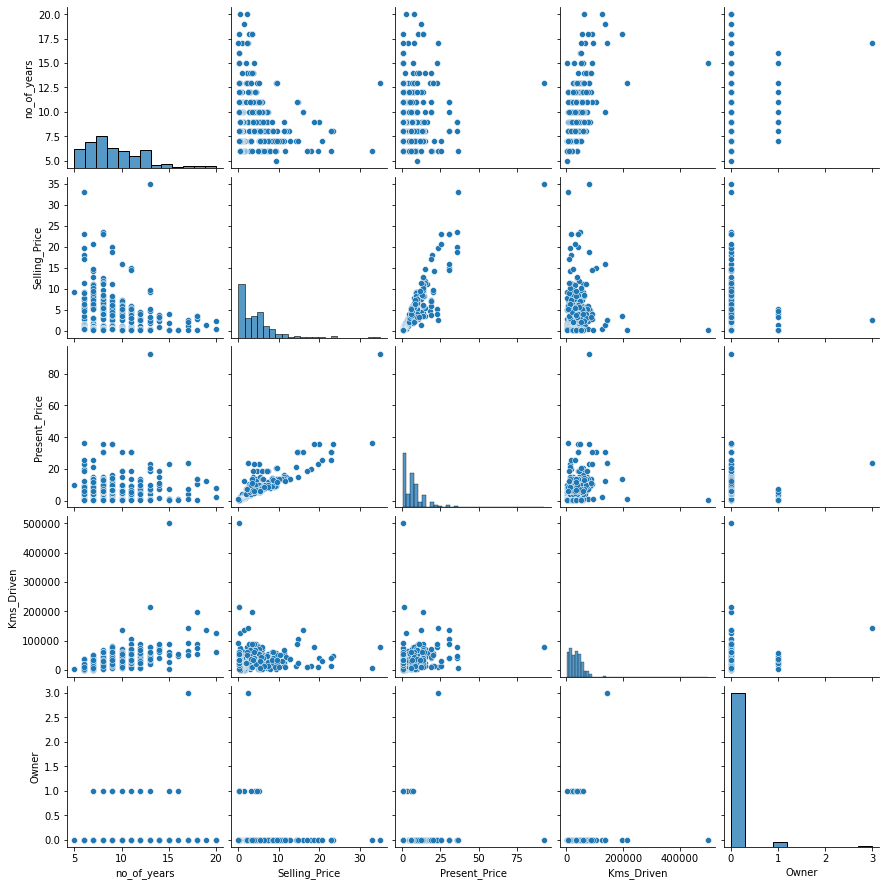

In [51]:
import seaborn as sns
sns.pairplot(raw_data_frame3[['no_of_years', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner']])
plt.show()

A pair plot, also known as a scatterplot matrix, is a visualization technique used in machine learning to display the relationship between multiple variables in a dataset. It creates a matrix of scatterplots, where each plot shows the relationship between two variables. It can also display the distribution of a single variable on the diagonal. Pair plots are commonly used in exploratory data analysis and can help identify patterns and correlations in the data.

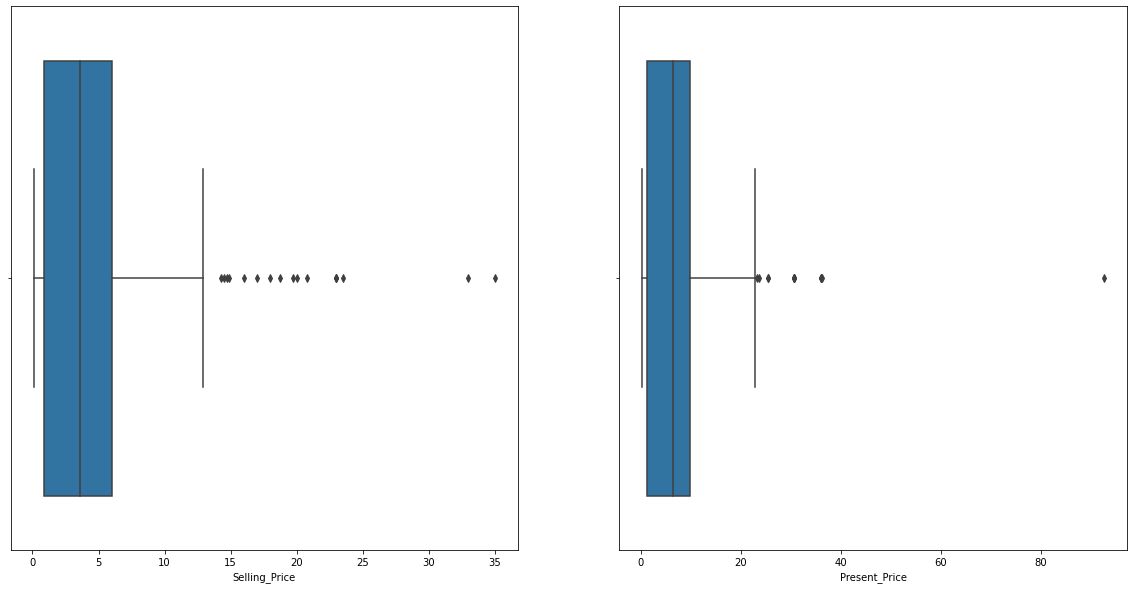

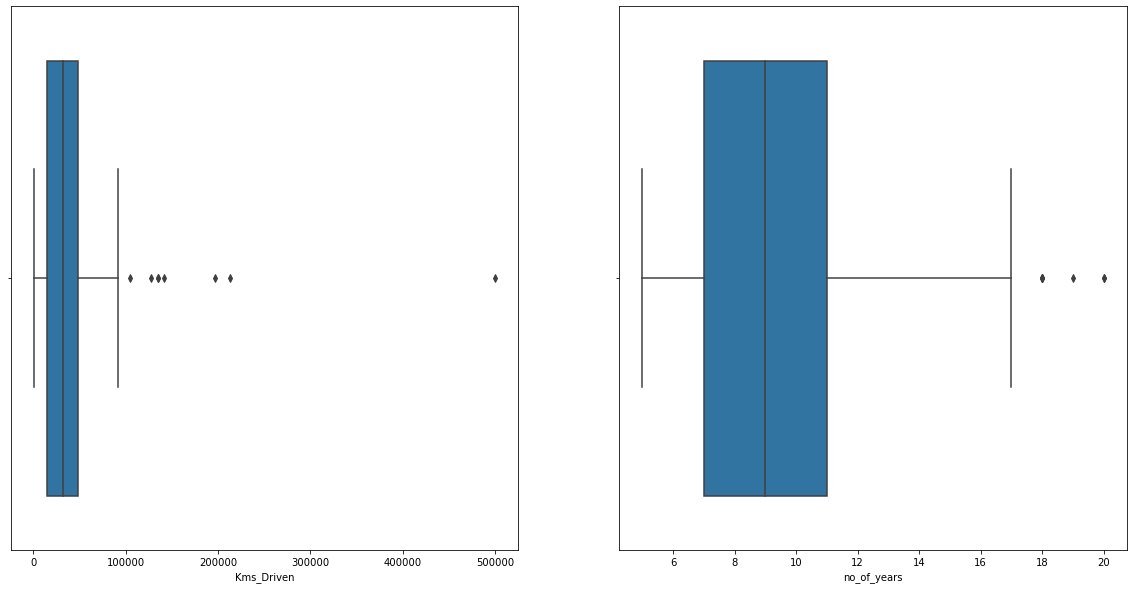

In [52]:
List = ['Selling_Price','Present_Price','Kms_Driven','no_of_years']
j=0
while j<4:
    plt.subplot(1,2,1)
    sns.boxplot(x=List[j], data=raw_data_frame3)
    j += 1
    plt.subplot(1,2,2)
    sns.boxplot(x=List[j], data=raw_data_frame3)
    j += 1
    plt.show()

Box Plot tells us the information regarding columns by finding the lower and upper quartile of columns. In these box plot we can see how much of data exists before upper and lower quartile and also show some outliers. Since noise is very small there is no need to work on it

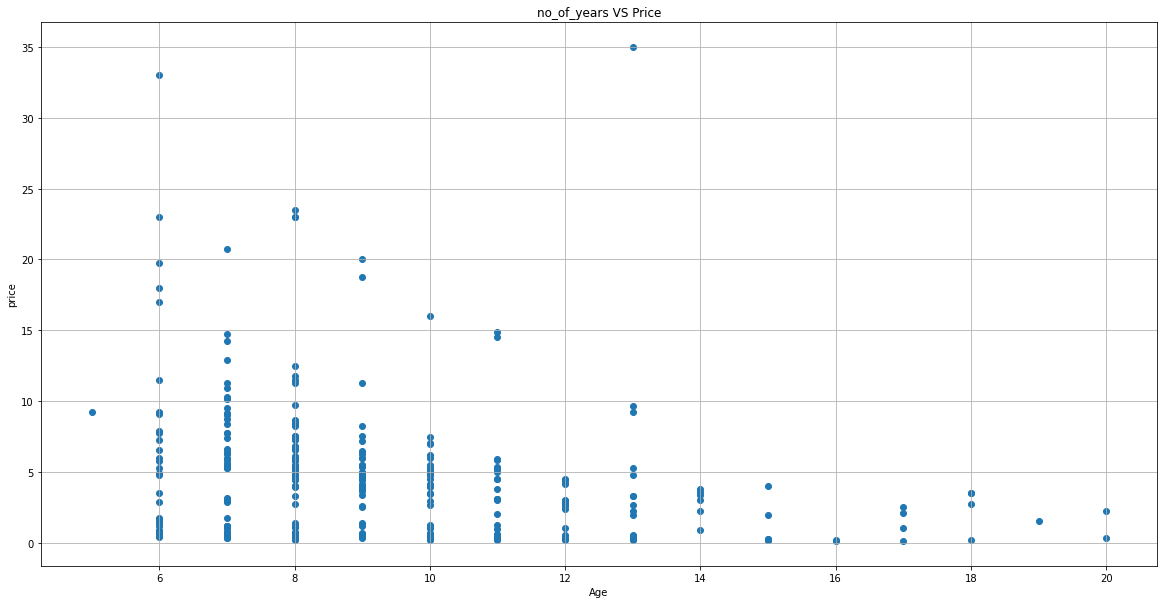

In [53]:
#SCatter Plot between no of years and selling price to see the price variation based on how much car is old
plt.scatter(raw_data_frame3["no_of_years"], raw_data_frame3["Selling_Price"])
plt.title("no_of_years VS Price")
plt.xlabel("Age")
plt.ylabel("price")
plt.grid()

C:\Users\USMANJ~1\AppData\Local\Temp/ipykernel_17940/1655349716.py:2: UserWarning: ignore
  warnings.warn('ignore')
C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

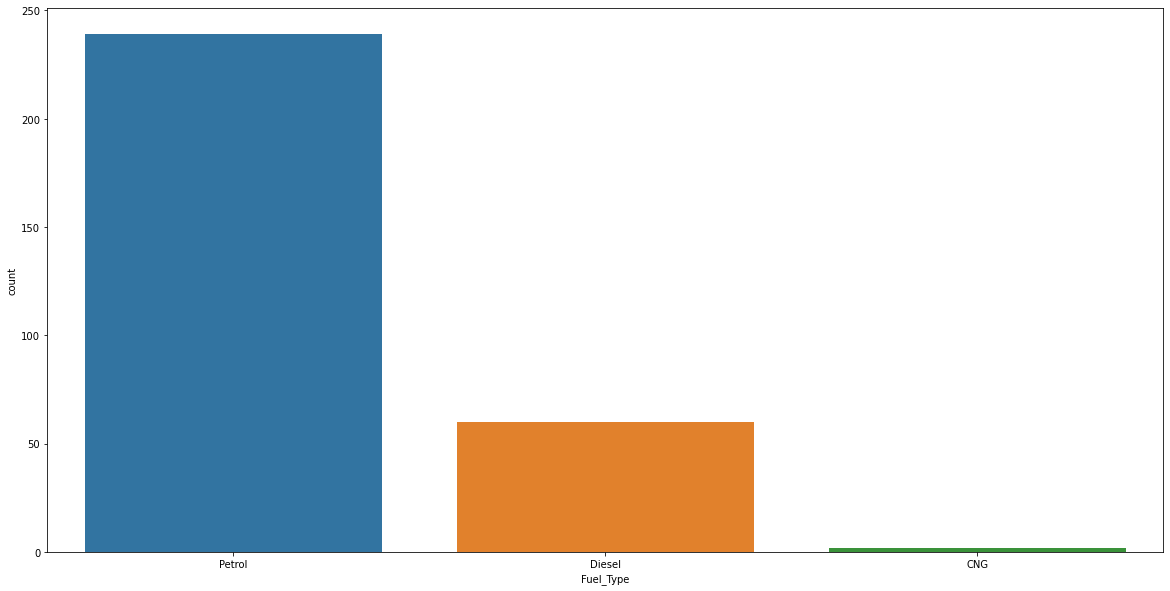

In [54]:
import warnings
warnings.warn('ignore')
#observing the frequency of cars segregation based on fuel type
sns.countplot(raw_data_frame3["Fuel_Type"])

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


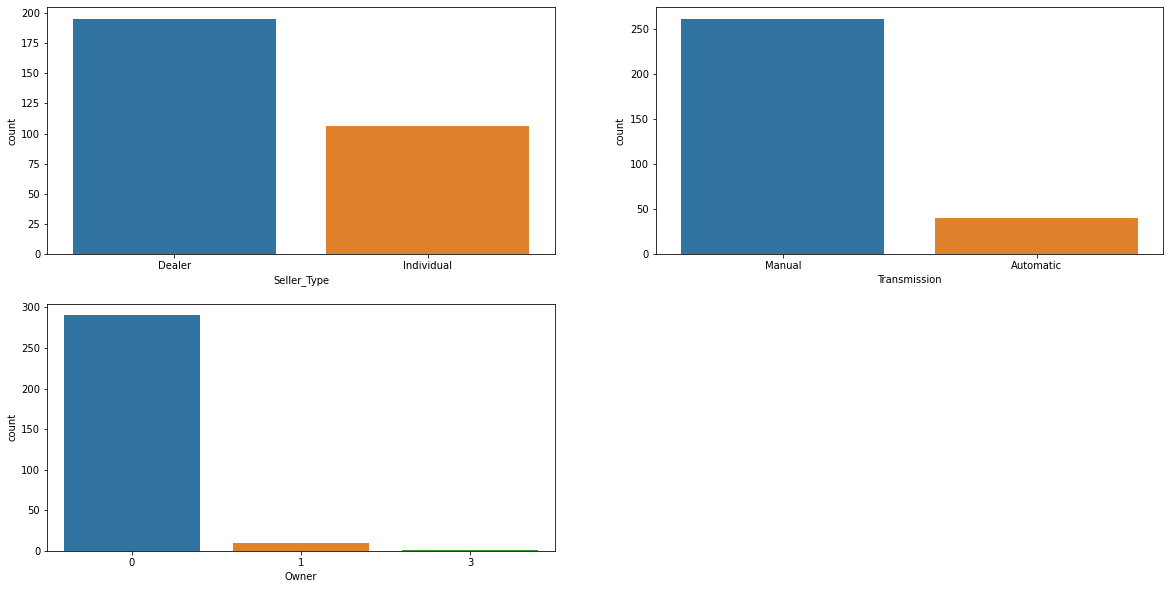

In [55]:
plt.subplot(2,2,1)
sns.countplot(raw_data_frame3.Seller_Type)
plt.subplot(2,2,2)
sns.countplot(raw_data_frame3.Transmission)
plt.subplot(2,2,3)
sns.countplot(raw_data_frame3.Owner)
plt.show()

### Correlation Matrix 

Correlation matrix tells us the linearity relationship between 2 variables. Its values exist between -1 to 1. 1 means variable are highly linear in relation and -1 means they are negatively linear and we use this matrix to drop useless columns

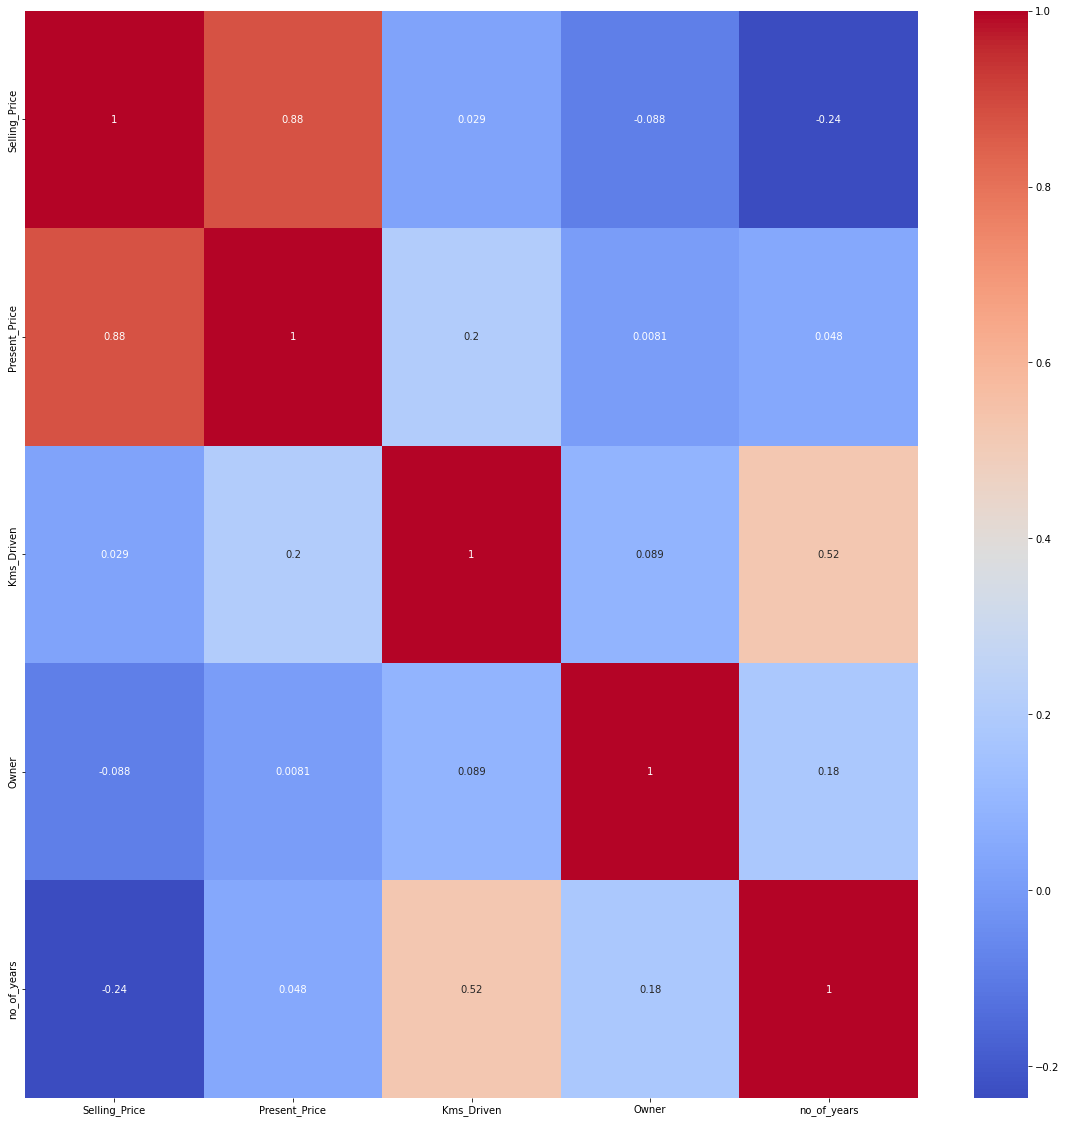

In [56]:
#get correlations of each features in dataset
matrix = raw_data_frame3.corr()
top_corr_features = matrix.index
plt.figure(figsize=(20,20))
#plot heat map
mapp=sns.heatmap(raw_data_frame3[top_corr_features].corr(),annot=True,cmap="coolwarm")

# Label Encoding

In [57]:
raw_data_frame3.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


As mentioned earlier machine learning model only works with numbers so we will perform label encoding on three columns to convert their unique values to numbers

In [58]:
from sklearn.preprocessing import LabelEncoder
columns = ['Fuel_Type', 'Seller_Type', 'Transmission']
encoder = LabelEncoder()
for i in columns:
    raw_data_frame3[i] = encoder.fit_transform(raw_data_frame3[i]) 

In [59]:
raw_data_frame3.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_years
0,3.35,5.59,27000,2,0,1,0,9
1,4.75,9.54,43000,1,0,1,0,10
2,7.25,9.85,6900,2,0,1,0,6
3,2.85,4.15,5200,2,0,1,0,12
4,4.60,6.87,42450,1,0,1,0,9


In [60]:
raw_data_frame3.Seller_Type.unique()

array([0, 1])

# First Normal Form

In [61]:
final_form = raw_data_frame3.copy()

In [62]:
final_form.head(2)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_years
0,3.35,5.59,27000,2,0,1,0,9
1,4.75,9.54,43000,1,0,1,0,10


# Building Machines Learning Model

Linear regression is a statistical method that is used to model the relationship between a dependent variable (also known as the output variable) and one or more independent variables (also known as the input variables or predictors). The model takes the form of a linear equation, with the goal of finding the best-fitting line through a set of data points. The coefficients of the line, which are determined through the training process, can be used to make predictions about the dependent variable based on new values of the independent variables. Linear regression is commonly used for tasks such as predicting future values, identifying trends, and understanding the impact of different variables on a particular outcome.

In [63]:
# Segregating label and features because it is a tagged label dataset
x = final_form.drop('Selling_Price', axis=1)
y = final_form["Selling_Price"]

In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [65]:
from sklearn.linear_model import LinearRegression
model  = LinearRegression()
model.fit(x_train,y_train)
pred_val = model.predict(x_train)

In [66]:
from sklearn.metrics import mean_absolute_error,plot_confusion_matrix
mse = np.sqrt(mean_absolute_error(y_train,pred_val))
print(mse)

1.10560060380298


In [67]:
model.score(x_train,y_train)

0.8684260777667911

In [68]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=200, test_size=0.2, random_state=0)
arr = cross_val_score(LinearRegression(), x, y, cv=cv)
np.argmax(arr)

117

In [69]:
# Final Accuracy of Model Using K Fold Cross Validation- on 200 splits
arr[np.argmax(arr)]*100

93.08099006710182

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

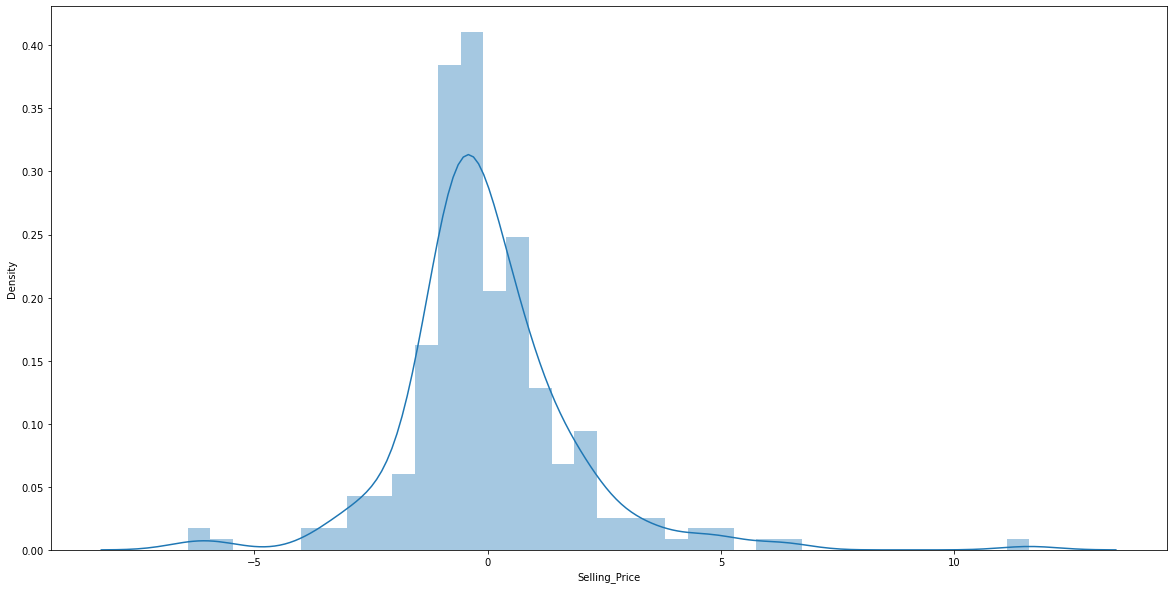

In [70]:
sns.distplot(y_train-pred_val)

From the curve we can clearly observe that the distribution is normal which means that our model is working good enough and has achieved much better accuracy

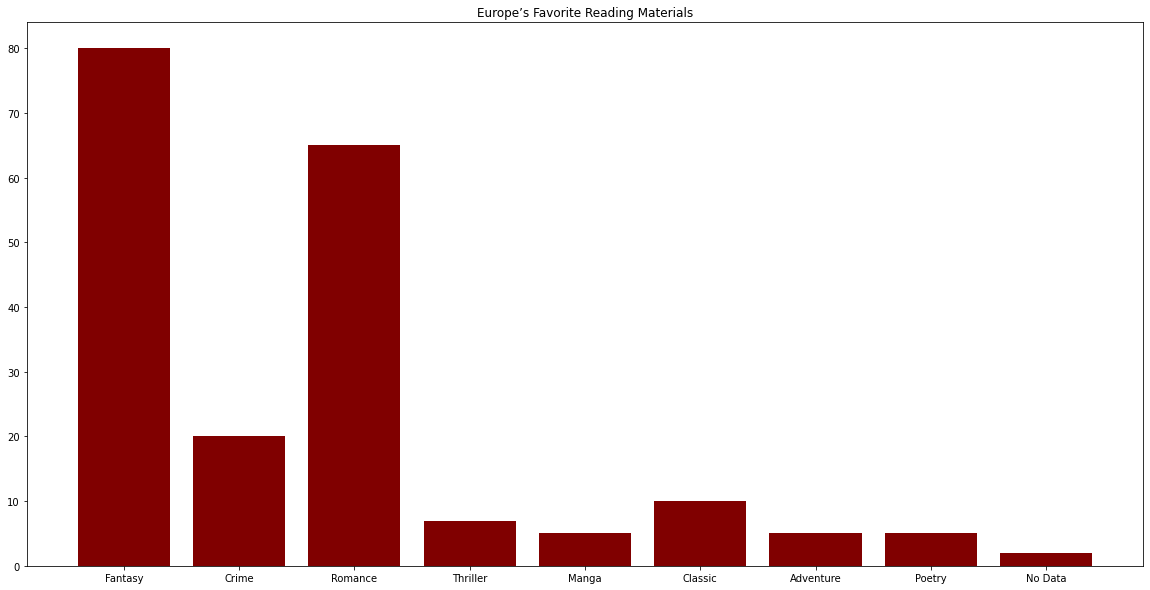

In [81]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# create a dataset
height = [80, 20, 65, 7, 5, 10, 5, 5, 2]
bars = ('Fantasy', 'Crime', 'Romance', 'Thriller', 'Manga', 'Classic', 'Adventure', 'Poetry', 'No Data')
x_pos = np.arange(len(bars))

# Create bars
plt.bar(x_pos, height, color='maroon')

# Create names on the x-axis
plt.xticks(x_pos, bars)
plt.title('Europe’s Favorite Reading Materials')
#plt.legend(height,['Brazil', 'Norwey', 'Latin-America', 'Netherlands', 'Japan', 'UK', 'South-Asia', 'Asia', 'Other Countries'])
# Show graph
plt.show()